# Datos de Hoteles

En este notebook analizaremos un dataset de reservas hoteleras, realizando modificaciones y adaptaciones para facilitar su estudio y visualización. Exploraremos las características principales de las reservas, los tipos de clientes, los canales de distribución y otros aspectos relevantes para comprender el comportamiento de los huéspedes y las tendencias en el sector hotelero.

In [187]:
!pip install pandas matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Alumno_AI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [188]:
import pandas as pd
df = pd.read_csv('../data/raw/bookings_hotel.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Importación de librerias

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Modificaciones del dataset, adaptado a nuestros requisitos.

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [191]:
import pandas as pd

# Unir columnas y crear la fecha como string
df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str)

# Convertir a datetime
df['arrival_date'] = pd.to_datetime(df['arrival_date'], format='%Y-%B-%d')

# Formatear como string YYYY-MM-DD
df['arrival_date'] = df['arrival_date'].dt.strftime('%Y-%m-%d')

# Calcular el número de dias
df['days_of_reservation'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Generar la columna de fecha de salida con los días de reserva
df['departure_date'] = pd.to_datetime(df['arrival_date']) + pd.to_timedelta(df['days_of_reservation'], unit='d')

# Formatear columna children a int
df['children'] = df['children'].fillna(0).astype(int)

# Eliminar columnas innecesarias
df = df.drop(['agent', 'company', 'arrival_date_week_number', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'lead_time', 'reserved_room_type', 'assigned_room_type', 'babies',
              'stays_in_weekend_nights', 'stays_in_week_nights', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'adr', 'total_of_special_requests', 'reservation_status', 'previous_cancellations',
              ], axis=1)


Agregar Datos de los húespedes

In [192]:
import numpy as np

# Crear columnas para hombres y mujeres
df['mens'] = 0
df['womens'] = 0

# Asignar valores basados en el número de adultos
df.loc[df['adults'] == 1, 'mens'] = 1  # Si hay 1 adulto, asignar como hombre
df.loc[df['adults'] == 2, ['mens', 'womens']] = 1  # Si hay 2 adultos, asignar 1 y 1
df.loc[df['adults'] > 2, 'mens'] = df.loc[df['adults'] > 2, 'adults'] - 1  # Si hay más de 2, asignar n-1 hombres
df.loc[df['adults'] > 2, 'womens'] = 1  # Y 1 mujer

# Crear lista de rangos de edad con probabilidades
# Mayor probabilidad para 18-30 y 65+
rangos = ['18-30', '31-50', '51-65', '65+']
probabilidades = [0.4, 0.15, 0.15, 0.3]  # 40% para 18-30, 30% para 65+, resto distribuido

# Generar rangos de edad aleatorios basados en probabilidades
rangos_edad = np.random.choice(rangos, size=len(df), p=probabilidades)


# Convertir booleanos a 0 y 1
df['age_18-30'] = (rangos_edad == '18-30').astype(int)
df['age_31-50'] = (rangos_edad == '31-50').astype(int)
df['age_51-65'] = (rangos_edad == '51-65').astype(int)
df['age_65+'] = (rangos_edad == '65+').astype(int)



In [193]:
df.head()

,hotel,is_canceled,adults,children,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_bookings_not_canceled,...,reservation_status_date,arrival_date,days_of_reservation,departure_date,mens,womens,age_18-30,age_31-50,age_51-65,age_65+
0,Resort Hotel,0,2,0,BB,PRT,Direct,Direct,0,0,...,2015-07-01,2015-07-01,0,2015-07-01,1,1,1,0,0,0
1,Resort Hotel,0,2,0,BB,PRT,Direct,Direct,0,0,...,2015-07-01,2015-07-01,0,2015-07-01,1,1,0,0,0,1
2,Resort Hotel,0,1,0,BB,GBR,Direct,Direct,0,0,...,2015-07-02,2015-07-01,1,2015-07-02,1,0,0,0,1,0
3,Resort Hotel,0,1,0,BB,GBR,Corporate,Corporate,0,0,...,2015-07-02,2015-07-01,1,2015-07-02,1,0,1,0,0,0
4,Resort Hotel,0,2,0,BB,GBR,Online TA,TA/TO,0,0,...,2015-07-03,2015-07-01,2,2015-07-03,1,1,0,1,0,0


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   adults                          119390 non-null  int64         
 3   children                        119390 non-null  int64         
 4   meal                            119390 non-null  object        
 5   country                         118902 non-null  object        
 6   market_segment                  119390 non-null  object        
 7   distribution_channel            119390 non-null  object        
 8   is_repeated_guest               119390 non-null  int64         
 9   previous_bookings_not_canceled  119390 non-null  int64         
 10  customer_type                   119390 non-null  object 

## Descripción de Datos

### 🍽️ Tipos de Régimen Alimenticio (`meal`)

| Código     | Significado       | Descripción                                                                 |
|------------|-------------------|------------------------------------------------------------------------------|
| `BB`       | Bed & Breakfast    | Alojamiento con desayuno incluido.                                          |
| `FB`       | Full Board         | Pensión completa: desayuno, almuerzo y cena incluidos.                      |
| `HB`       | Half Board         | Media pensión: desayuno y una comida adicional (almuerzo o cena).           |
| `SC`       | Self Catering      | Solo alojamiento, sin comidas incluidas.                                    |
| `Undefined`| No definido        | El régimen alimenticio no fue especificado o no se encuentra en la base.    |


### 🧍 Tipos de Cliente (`customer_type`)

| Código             | Descripción                                                                 |
|--------------------|------------------------------------------------------------------------------|
| `Transient`        | Cliente que reserva individualmente sin contrato previo ni condiciones especiales. |
| `Contract`         | Cliente asociado a un contrato corporativo o comercial con el hotel.         |
| `Transient-Party`  | Grupo de clientes transitorios que viajan juntos, como parte de una pequeña excursión o familia. |
| `Group`            | Clientes que forman parte de una reserva de grupo organizada (por ejemplo, tours o eventos). |

### 🛎️ Canal de Distribución (`distribution_channel`)

| Código      | Significado                             | Descripción                                                                 |
|-------------|------------------------------------------|------------------------------------------------------------------------------|
| `Direct`    | Directo                                  | El cliente reservó directamente con el hotel (por teléfono, web propia, etc.). |
| `Corporate` | Corporativo                              | Reserva realizada a través de acuerdos con empresas o agencias corporativas. |
| `TA/TO`     | Travel Agent / Tour Operator             | Reserva gestionada por agencias de viaje o turoperadores.                   |
| `GDS`       | Global Distribution System               | Plataforma global de reservas (como Amadeus, Sabre, Galileo, etc.).         |
| `Undefined` | No definido                              | El canal de distribución no fue especificado en el registro.                |

### 📊 Segmento de Mercado (`market_segment`)

| Código           | Significado                           | Descripción                                                                 |
|------------------|----------------------------------------|------------------------------------------------------------------------------|
| `Direct`         | Directo                                | El cliente contactó y reservó directamente con el hotel.                    |
| `Corporate`      | Corporativo                            | Reservas hechas por empresas o con acuerdos corporativos.                   |
| `Online TA`      | Agencia de viajes online               | Reservas a través de plataformas como Booking.com, Expedia, etc.            |
| `Offline TA/TO`  | Agencia/Turoperador offline            | Reservas hechas mediante agencias tradicionales o turoperadores físicos.    |
| `Complementary`  | Complementaria                         | Estancia gratuita (por ejemplo, cortesía, promociones, empleados, etc.).    |
| `Groups`         | Grupos                                 | Reservas de grupos grandes organizados (tours, eventos, etc.).              |
| `Undefined`      | No definido                            | El segmento no fue especificado o está sin clasificar.                      |
| `Aviation`       | Aviación                               | Reservas vinculadas a aerolíneas (tripulación, convenios, retrasos, etc.).  |



Eliminar reservas que tengan dias = 0

In [195]:
df.drop(df[df['days_of_reservation'] == 0].index, inplace=True)
df.head()

,hotel,is_canceled,adults,children,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_bookings_not_canceled,...,reservation_status_date,arrival_date,days_of_reservation,departure_date,mens,womens,age_18-30,age_31-50,age_51-65,age_65+
2,Resort Hotel,0,1,0,BB,GBR,Direct,Direct,0,0,...,2015-07-02,2015-07-01,1,2015-07-02,1,0,0,0,1,0
3,Resort Hotel,0,1,0,BB,GBR,Corporate,Corporate,0,0,...,2015-07-02,2015-07-01,1,2015-07-02,1,0,1,0,0,0
4,Resort Hotel,0,2,0,BB,GBR,Online TA,TA/TO,0,0,...,2015-07-03,2015-07-01,2,2015-07-03,1,1,0,1,0,0
5,Resort Hotel,0,2,0,BB,GBR,Online TA,TA/TO,0,0,...,2015-07-03,2015-07-01,2,2015-07-03,1,1,1,0,0,0
6,Resort Hotel,0,2,0,BB,PRT,Direct,Direct,0,0,...,2015-07-03,2015-07-01,2,2015-07-03,1,1,0,0,1,0


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118675 entries, 2 to 119389
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118675 non-null  object        
 1   is_canceled                     118675 non-null  int64         
 2   adults                          118675 non-null  int64         
 3   children                        118675 non-null  int64         
 4   meal                            118675 non-null  object        
 5   country                         118201 non-null  object        
 6   market_segment                  118675 non-null  object        
 7   distribution_channel            118675 non-null  object        
 8   is_repeated_guest               118675 non-null  int64         
 9   previous_bookings_not_canceled  118675 non-null  int64         
 10  customer_type                   118675 non-null  object      

In [197]:
# Renombrar las columnas a español
df.rename(columns={
    'hotel': 'hotel',
    'is_canceled': 'cancelado',
    'adults': 'adultos',
    'children': 'niños',
    'babies': 'bebés',
    'meal': 'régimen',
    'country': 'nacionalidad_húesped',
    'market_segment': 'público_objetivo',
    'distribution_channel': 'canal_distribución',
    'is_repeated_guest': 'cliente_recurrente',
    'previous_bookings_not_canceled': 'reservas_previas_no_canceladas',
    'customer_type': 'tipo_cliente',
    'required_car_parking_spaces': 'plazas_aparcamiento',
    'reservation_status_date': 'fecha_estado_reserva',
    'arrival_date': 'fecha_llegada',
    'departure_date': 'fecha_salida',
    'days_of_reservation': 'días_reserva',
    'mens': 'hombres',
    'womens': 'mujeres',
    'age_18-30': 'edad_18-30',
    'age_31-50': 'edad_31-50',
    'age_51-65': 'edad_51-65',
    'age_65+': 'edad_65+',
}, inplace=True)


In [198]:
df.head()

# Guardar el dataframe limpio
df.to_csv('../data/processed/bookings_hotel_clean.csv', index=False)

In [199]:
columnas_ordenadas = [
    # Hotel / Reserva
    'hotel', 'cancelado', 'régimen', 'canal_distribución',
    'tipo_cliente', 'cliente_recurrente', 'reservas_previas_no_canceladas',
    
    # Cliente
    'adultos', 'niños', 'hombres', 'mujeres', 'edad_18-30', 'edad_31-50', 'edad_51-65', 'edad_65+',
    'nacionalidad_húesped', 'público_objetivo',
    
    # Fechas
    'fecha_estado_reserva', 'fecha_llegada', 'fecha_salida', 'días_reserva',
    
    # Otros
    'plazas_aparcamiento'
]

df = df[columnas_ordenadas]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118675 entries, 2 to 119389
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118675 non-null  object        
 1   cancelado                       118675 non-null  int64         
 2   régimen                         118675 non-null  object        
 3   canal_distribución              118675 non-null  object        
 4   tipo_cliente                    118675 non-null  object        
 5   cliente_recurrente              118675 non-null  int64         
 6   reservas_previas_no_canceladas  118675 non-null  int64         
 7   adultos                         118675 non-null  int64         
 8   niños                           118675 non-null  int64         
 9   hombres                         118675 non-null  int64         
 10  mujeres                         118675 non-null  int64       

In [200]:
df.head()

,hotel,cancelado,régimen,canal_distribución,tipo_cliente,cliente_recurrente,reservas_previas_no_canceladas,adultos,niños,hombres,...,edad_31-50,edad_51-65,edad_65+,nacionalidad_húesped,público_objetivo,fecha_estado_reserva,fecha_llegada,fecha_salida,días_reserva,plazas_aparcamiento
2,Resort Hotel,0,BB,Direct,Transient,0,0,1,0,1,...,0,1,0,GBR,Direct,2015-07-02,2015-07-01,2015-07-02,1,0
3,Resort Hotel,0,BB,Corporate,Transient,0,0,1,0,1,...,0,0,0,GBR,Corporate,2015-07-02,2015-07-01,2015-07-02,1,0
4,Resort Hotel,0,BB,TA/TO,Transient,0,0,2,0,1,...,1,0,0,GBR,Online TA,2015-07-03,2015-07-01,2015-07-03,2,0
5,Resort Hotel,0,BB,TA/TO,Transient,0,0,2,0,1,...,0,0,0,GBR,Online TA,2015-07-03,2015-07-01,2015-07-03,2,0
6,Resort Hotel,0,BB,Direct,Transient,0,0,2,0,1,...,0,1,0,PRT,Direct,2015-07-03,2015-07-01,2015-07-03,2,0


## Configurar nuestros hoteles
En el Dataset actual existen unicamente dos hoteles, agregaremos más hoteles y sus respectivas ubicaciones.


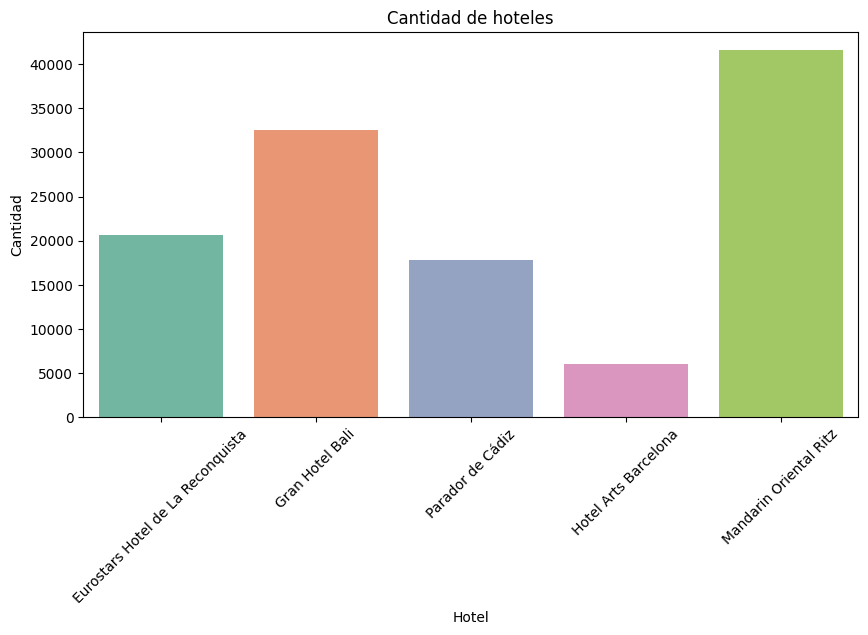

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfica para ver la cantidad de hoteles
plt.figure(figsize=(10, 5))
sns.countplot(x='hotel', data=df, palette='Set2')
plt.title('Cantidad de hoteles')
plt.xlabel('Hotel')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()


### Hoteles elegidos para esta práctica
| Hotel                           | Ubicación   | Público objetivo                                                                 |
|--------------------------------|-------------|----------------------------------------------------------------------------------|
| Mandarin Oriental Ritz         | Madrid      | Turistas internacionales que quieren disfrutar de las mejores zonas de Madrid, gracias a su buena ubicación en el centro.      |
| Gran Hotel Bali                | Benidorm    | Grupos de personas jubiladas y grupos que buscan ocio, piscinas y playa, en cualquier época del año, gracias a los viajes del imserso. |
| Parador de Cádiz               | Cádiz       | Parejas y viajeros que buscan una escapada para disfrutar de su gatronomía y sus playas gracias a su buen tiempo durante casi todo el año.  |
| Eurostars Hotel de La Reconquista | Asturias | Clientes que buscan un hotel centrico para hacer turismo historico por la ciudad.         |
| Hotel Arts Barcelona           | Barcelona   | Turistas de lujo que buscan una experiencia de premium en la ciudad de Barcelona, con gran ubicacioón frente al mar y su alta calidad de servicio. |

In [205]:
# Crear un mapeo de los hoteles originales a los nuevos nombres
hotel_mapping = {
    'Resort Hotel': 'Gran Hotel Bali',  # Mayor proporción de 65+ por el IMSERSO
    'City Hotel': 'Mandarin Oriental Ritz'  # Más diversificado en edades
}

# Crear un diccionario con las ubicaciones
ubicaciones = {
    'Gran Hotel Bali': 'Benidorm',
    'Mandarin Oriental Ritz': 'Madrid',
    'Parador de Cádiz': 'Cádiz',
    'Eurostars Hotel de La Reconquista': 'Asturias',
    'Hotel Arts Barcelona': 'Barcelona'
}

# Reemplazar inicialmente los nombres según el mapeo original
df['hotel'] = df['hotel'].map(hotel_mapping)
df['ubicación'] = df['hotel'].map(ubicaciones)

# Reasignar hoteles considerando la demografía
# Gran Hotel Bali - preferencia para 65+
indices_mayores = df[df['edad_65+'] == 1].sample(frac=0.4).index
df.loc[indices_mayores, 'hotel'] = 'Gran Hotel Bali'
df.loc[indices_mayores, 'ubicación'] = 'Benidorm'

# Hotel Arts Barcelona - preferencia para 31-50 (turismo de lujo)
indices_mediana = df[df['edad_31-50'] == 1].sample(frac=0.4).index
df.loc[indices_mediana, 'hotel'] = 'Hotel Arts Barcelona'
df.loc[indices_mediana, 'ubicación'] = 'Barcelona'

# Parador de Cádiz - preferencia para parejas (distribución mixta)
indices_parejas = df[df['adultos'] == 2].sample(frac=0.2).index
df.loc[indices_parejas, 'hotel'] = 'Parador de Cádiz'
df.loc[indices_parejas, 'ubicación'] = 'Cádiz'

# Eurostars Hotel - preferencia para turismo cultural (distribución mixta)
indices_restantes = df[~df.index.isin(indices_mayores) & 
                      ~df.index.isin(indices_mediana) & 
                      ~df.index.isin(indices_parejas)].sample(frac=0.25).index
df.loc[indices_restantes, 'hotel'] = 'Eurostars Hotel de La Reconquista'
df.loc[indices_restantes, 'ubicación'] = 'Asturias'



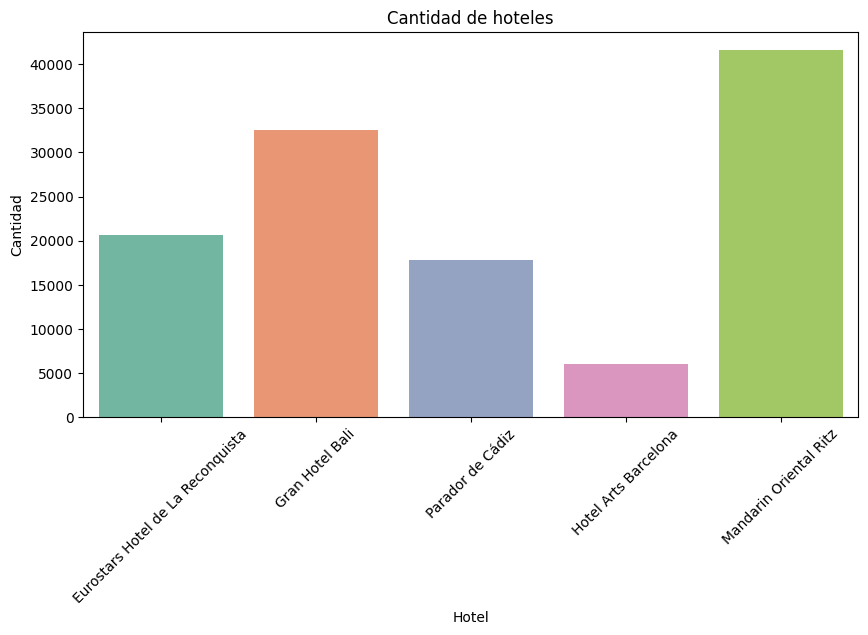

In [211]:
# grafica para ver los hoteles
plt.figure(figsize=(10, 5))
sns.countplot(x='hotel', data=df, palette='Set2')
plt.title('Cantidad de hoteles')
plt.xlabel('Hotel')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()


In [206]:
df.head()

,hotel,cancelado,régimen,canal_distribución,tipo_cliente,cliente_recurrente,reservas_previas_no_canceladas,adultos,niños,hombres,...,edad_51-65,edad_65+,nacionalidad_húesped,público_objetivo,fecha_estado_reserva,fecha_llegada,fecha_salida,días_reserva,plazas_aparcamiento,ubicación
2,Eurostars Hotel de La Reconquista,0,BB,Direct,Transient,0,0,1,0,1,...,1,0,GBR,Direct,2015-07-02,2015-07-01,2015-07-02,1,0,Asturias
3,Gran Hotel Bali,0,BB,Corporate,Transient,0,0,1,0,1,...,0,0,GBR,Corporate,2015-07-02,2015-07-01,2015-07-02,1,0,Benidorm
4,Eurostars Hotel de La Reconquista,0,BB,TA/TO,Transient,0,0,2,0,1,...,0,0,GBR,Online TA,2015-07-03,2015-07-01,2015-07-03,2,0,Asturias
5,Gran Hotel Bali,0,BB,TA/TO,Transient,0,0,2,0,1,...,0,0,GBR,Online TA,2015-07-03,2015-07-01,2015-07-03,2,0,Benidorm
6,Eurostars Hotel de La Reconquista,0,BB,Direct,Transient,0,0,2,0,1,...,1,0,PRT,Direct,2015-07-03,2015-07-01,2015-07-03,2,0,Asturias


### Gráficas descriptivas de los datos.

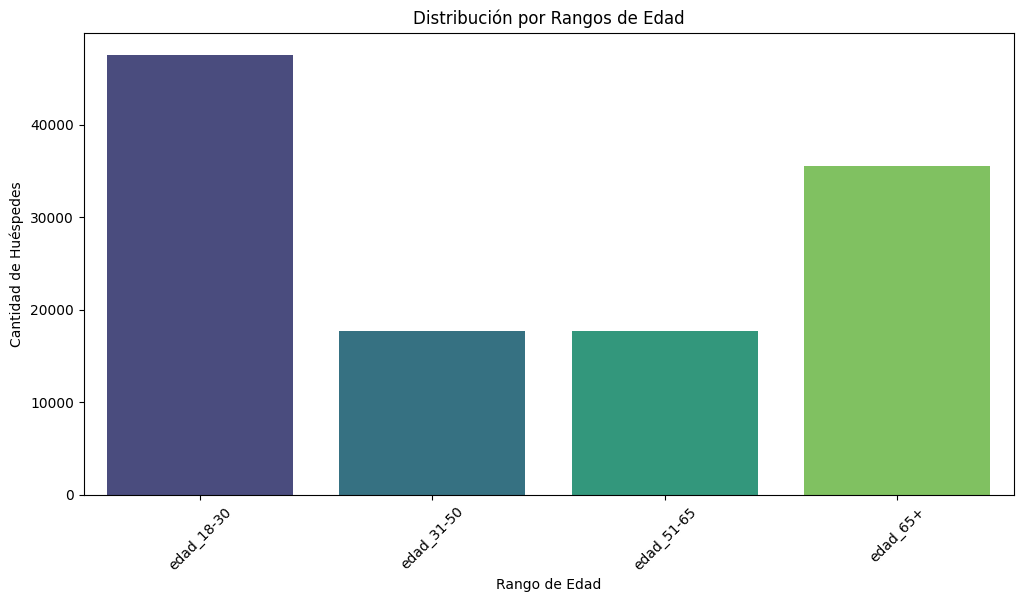

In [212]:
# Gráfica para ver la distribución de los huéspedes por edad

plt.figure(figsize=(12, 6))

edad_cols = ['edad_18-30', 'edad_31-50', 'edad_51-65', 'edad_65+']
valores = df[edad_cols].sum()
sns.barplot(x=valores.index, y=valores.values, palette='viridis')
plt.title('Distribución por Rangos de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Huéspedes')
plt.xticks(rotation=45)
plt.show()

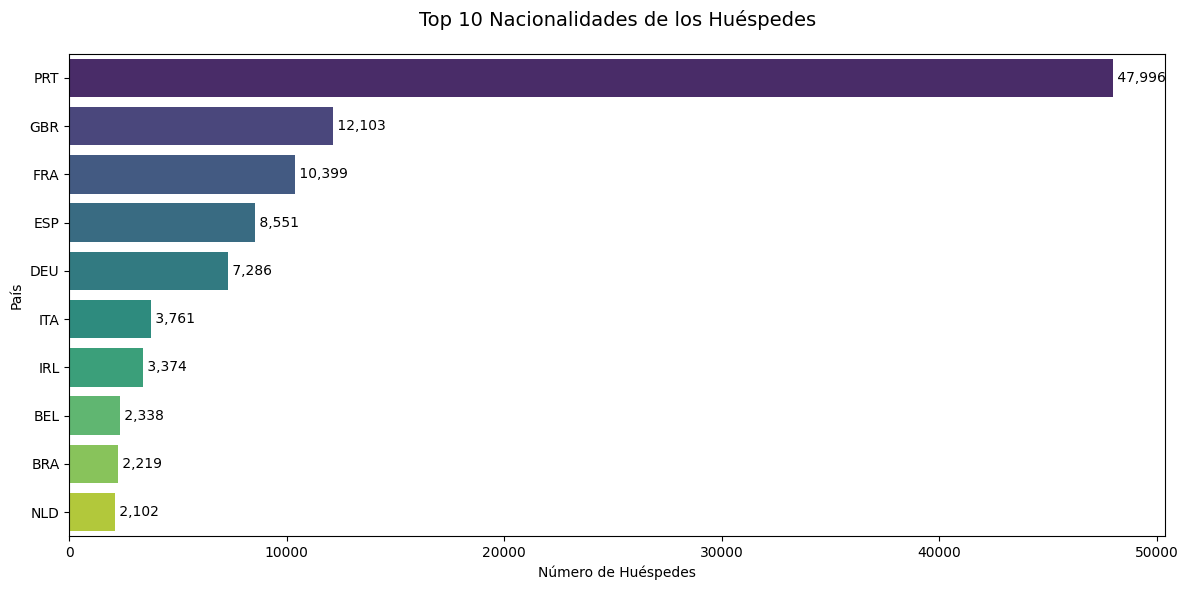

In [213]:
# Gráfica para ver la distribución de los huéspedes por nacionalidad

top_nacionalidades = df['nacionalidad_húesped'].value_counts().head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_nacionalidades.values, 
                 y=top_nacionalidades.index, 
                 palette='viridis')

plt.title('Top 10 Nacionalidades de los Huéspedes', pad=20, size=14)
plt.xlabel('Número de Huéspedes')
plt.ylabel('País')

for i, v in enumerate(top_nacionalidades.values):
    ax.text(v, i, f' {v:,}', va='center')

plt.tight_layout()
plt.show()

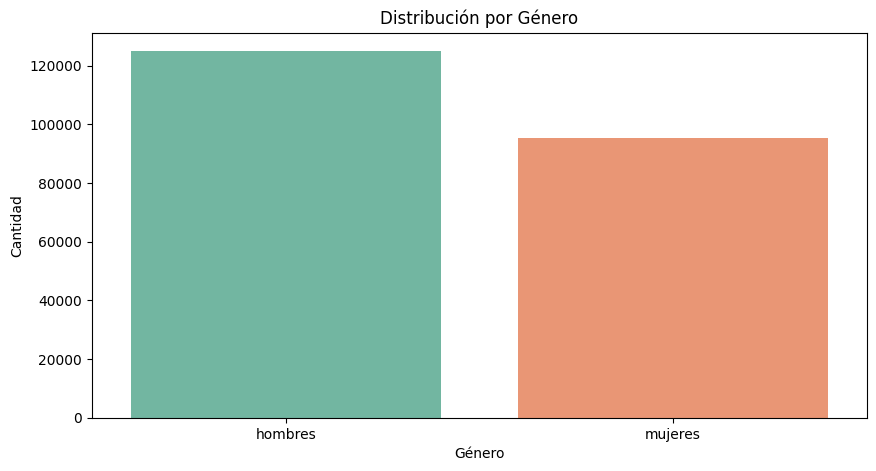

In [216]:
# Gráfica para ver la distribución de los huéspedes por género (hombres y mujeres)
plt.figure(figsize=(10, 5))
df_melted = df[['hombres', 'mujeres']].sum()
sns.barplot(x=df_melted.index, y=df_melted.values, palette='Set2')
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()